In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%pwd

'/home/cseadmin/undergrad1/dz/GISCUP2021/data_process'

In [3]:
link_time_attr=pd.read_csv("../data/link_time_attr.csv")
link_time_attr.set_index('Unnamed: 0',inplace=True)

link_time_attr

,std,avg,min,max,count,skew,kurt
Unnamed: 0,,,,,,,
157298,3.142503,5.023350,0.3210,14.4000,137.0,1.776284,2.674586
511622,1.761514,3.837049,0.2957,16.5600,141.0,3.177366,18.278032
524542,1.242140,2.905499,0.4696,12.9600,154.0,4.121032,27.224024
97293,1.929949,4.649475,2.0020,20.8800,161.0,4.476175,30.606515
273845,1.726321,4.192694,2.5297,18.7200,160.0,4.522993,30.850102
...,...,...,...,...,...,...,...
280667,0.000000,51.000000,51.0000,51.0000,1.0,0.000000,-3.000000
280020,0.000000,51.000000,51.0000,51.0000,1.0,0.000000,-3.000000
382296,0.000000,11.582600,11.5826,11.5826,1.0,0.000000,-3.000000


In [4]:
kmeans_input=link_time_attr["min"].values.reshape(-1, 1)

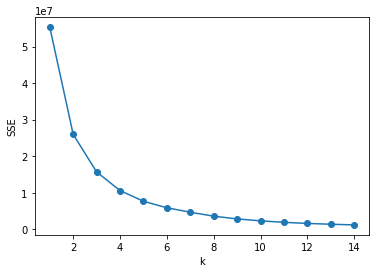

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

SSE=[]
for k in range(1, 15):
    estimator=KMeans(n_clusters=k)
    estimator.fit(kmeans_input)
    SSE.append(estimator.inertia_)

X=range(1, 15)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')

plt.show()

In [7]:
SSE

[55282110.58900844,
 25956185.50489932,
 15702926.05677186,
 10604038.750880044,
 7676749.624154481,
 5891610.551349427,
 4674884.2188554965,
 3590403.9809490666,
 2843030.9070474324,
 2315912.5318596885,
 1909431.563673093,
 1615492.847774524,
 1385657.4569715222,
 1202276.1350871671]

In [5]:
kmeans_model=KMeans(n_clusters=9)
kmeans_model.fit(kmeans_input)
link_time_attr["label"]=kmeans_model.labels_

link_time_attr

In [9]:
np.unique(link_time_attr["label"])

array([0, 1, 2, 3], dtype=int32)

In [10]:
link_time_attr.to_csv("../data/link_time_attr.csv")